# Fruits 360 - Convolutional Neural Networks Using TensorFlow

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
import os
from distutils.dir_util import copy_tree


fruits = '''
Pomegranate
Kaki
Pear
Avocado
Banana
Dates
Cocos
Mangostan
Lychee
Mulberry

'''.split()

for f in fruits:
    copy_tree("D:/data/fruits-360/Training/"+f, "D:/data/fruits-10-high-calorie/Training/"+f)
    copy_tree("D:/data/fruits-360/Test/"+f, "D:/data/fruits-10-high-calorie/Test/"+f)


In [15]:
fruits.split()

['Pomegranate',
 'Kaki',
 'Pear',
 'Avocado',
 'Banana',
 'Dates',
 'Cocos',
 'Mangostan',
 'Lychee',
 'Mulberry']

## Creating Data Pipelines

In [19]:
train_ds_ = image_dataset_from_directory(
    'D:/data/fruits-10-high-calorie/Training',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    interpolation='nearest',
    shuffle=True,
    batch_size=512
)

test_ds_ = image_dataset_from_directory(
    'D:/data//fruits-10-high-calorie/Test',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    interpolation='nearest',
    shuffle=False,
    batch_size=512
)

# Pipeline
def convert_to_float(image, label):
    image = image / 255
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

test_ds = (
    test_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 4653 files belonging to 10 classes.
Found 1567 files belonging to 10 classes.


In [42]:
train_ds._flat_shapes[1][1]

10

## Defining the Model

In [43]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(100,100,3)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_ds._flat_shapes[1][1], activation='softmax')
])

In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)        

## Training the Model

In [45]:
early_stopping = EarlyStopping(
    min_delta=1e-3,
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    batch_size=512,
    validation_data=(test_ds),
    callbacks=[early_stopping],
    epochs=500,
    verbose=1
)

Epoch 1/500
10/10 [==============================] - 57s 6s/step - loss: 1.7719 - accuracy: 0.3944 - val_loss: 1.0306 - val_accuracy: 0.6318
Epoch 2/500
10/10 [==============================] - 47s 5s/step - loss: 0.6014 - accuracy: 0.8416 - val_loss: 0.3974 - val_accuracy: 0.8532
Epoch 3/500
10/10 [==============================] - 45s 4s/step - loss: 0.1171 - accuracy: 0.9675 - val_loss: 0.3809 - val_accuracy: 0.9317
Epoch 4/500
10/10 [==============================] - 46s 5s/step - loss: 0.0222 - accuracy: 0.9942 - val_loss: 0.1955 - val_accuracy: 0.9445
Epoch 5/500
10/10 [==============================] - 45s 4s/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0807 - val_accuracy: 0.9617
Epoch 6/500
10/10 [==============================] - 45s 4s/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0739 - val_accuracy: 0.9751
Epoch 7/500
10/10 [==============================] - 45s 4s/step - loss: 6.2785e-04 - accuracy: 0.9998 - val_loss: 0.0324 - val_accuracy: 0.9936
Epoch 8/5

## Plotting Train and Validation Accuracy and Loss

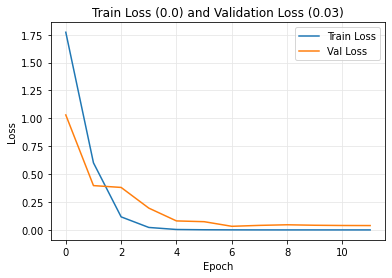

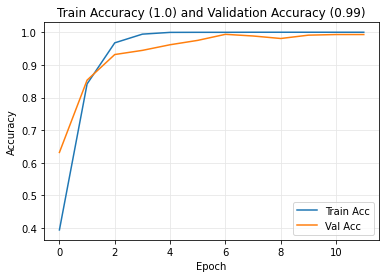

In [46]:
fit_hist = pd.DataFrame(history.history)

loss = round(np.min(fit_hist['loss']), 2)
val_loss = round(np.min(fit_hist['val_loss']), 2)
acc = round(np.max(fit_hist['accuracy']), 2)
val_acc = round(np.max(fit_hist['val_accuracy']), 2)

plt.title(f"Train Loss ({loss}) and Validation Loss ({val_loss})")
plt.plot(fit_hist['loss'], label='Train Loss')
plt.plot(fit_hist['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()

plt.title(f"Train Accuracy ({acc}) and Validation Accuracy ({val_acc})")
plt.plot(fit_hist['accuracy'], label='Train Acc')
plt.plot(fit_hist['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()